## Sussidi e misure per preservare l'ambiente

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import statsmodels.api as sm
import altair as alt
import json
import geopandas as gpd
import re
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

## La situazione Europea

Il Green Deal Europeo ha come principale obiettivo la riduzione di CO2, la preservazione dell'ambiente e il tentativo di portare entro il 2050 i dati relativi al surriscaldamento entro range tollerabili e non irreversibili.
Guardiamo la situazione relativa all'impatto agricolo del 2021.

In [2]:
co2_data = pd.read_csv("Pesticidi/dati emissioni europa.csv")
europe = gpd.read_file("Pesticidi/custom.geo.json")
co2_data

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Source Code,Source,Unit,Value,Flag,Flag Description
0,GT,Emissions totals,2,Afghanistan,7273,Emissions (CO2),6518,Agrifood systems,3050,FAO TIER 1,kt,2342.51,E,Estimated value
1,GT,Emissions totals,3,Albania,7273,Emissions (CO2),6518,Agrifood systems,3050,FAO TIER 1,kt,943.90,E,Estimated value
2,GT,Emissions totals,4,Algeria,7273,Emissions (CO2),6518,Agrifood systems,3050,FAO TIER 1,kt,35309.89,E,Estimated value
3,GT,Emissions totals,5,American Samoa,7273,Emissions (CO2),6518,Agrifood systems,3050,FAO TIER 1,kt,133.68,E,Estimated value
4,GT,Emissions totals,6,Andorra,7273,Emissions (CO2),6518,Agrifood systems,3050,FAO TIER 1,kt,56.07,E,Estimated value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,GT,Emissions totals,243,Wallis and Futuna Islands,7273,Emissions (CO2),6518,Agrifood systems,3050,FAO TIER 1,kt,2.22,E,Estimated value
230,GT,Emissions totals,205,Western Sahara,7273,Emissions (CO2),6518,Agrifood systems,3050,FAO TIER 1,kt,0.00,E,Estimated value
231,GT,Emissions totals,249,Yemen,7273,Emissions (CO2),6518,Agrifood systems,3050,FAO TIER 1,kt,2370.94,E,Estimated value
232,GT,Emissions totals,251,Zambia,7273,Emissions (CO2),6518,Agrifood systems,3050,FAO TIER 1,kt,34355.60,E,Estimated value


In [3]:
with open("Pesticidi/custom.geo.json", encoding="utf-8") as f:
    geojson_data = json.load(f)

country_names = [feature['properties']['name'] for feature in geojson_data['features']]
print(country_names)

['France', 'Ukraine', 'Belarus', 'Lithuania', 'Czechia', 'Germany', 'Estonia', 'Latvia', 'Norway', 'Sweden', 'Finland', 'Luxembourg', 'Belgium', 'North Macedonia', 'Albania', 'Kosovo', 'Spain', 'Denmark', 'Romania', 'Hungary', 'Slovakia', 'Poland', 'Ireland', 'United Kingdom', 'Greece', 'Austria', 'Italy', 'Switzerland', 'Netherlands', 'Liechtenstein', 'Serbia', 'Croatia', 'Slovenia', 'Bulgaria', 'San Marino', 'Monaco', 'Andorra', 'Montenegro', 'Bosnia and Herz.', 'Portugal', 'Moldova', 'Vatican', 'Iceland', 'Malta', 'Jersey', 'Guernsey', 'Isle of Man', 'Åland', 'Faeroe Is.']


In [4]:
for feature in geojson_data['features']:
    feature['properties']['Area'] = feature['properties'].pop('name')

with open("europe_modified.geojson", "w", encoding="utf-8") as f:
    json.dump(geojson_data, f, indent=4)

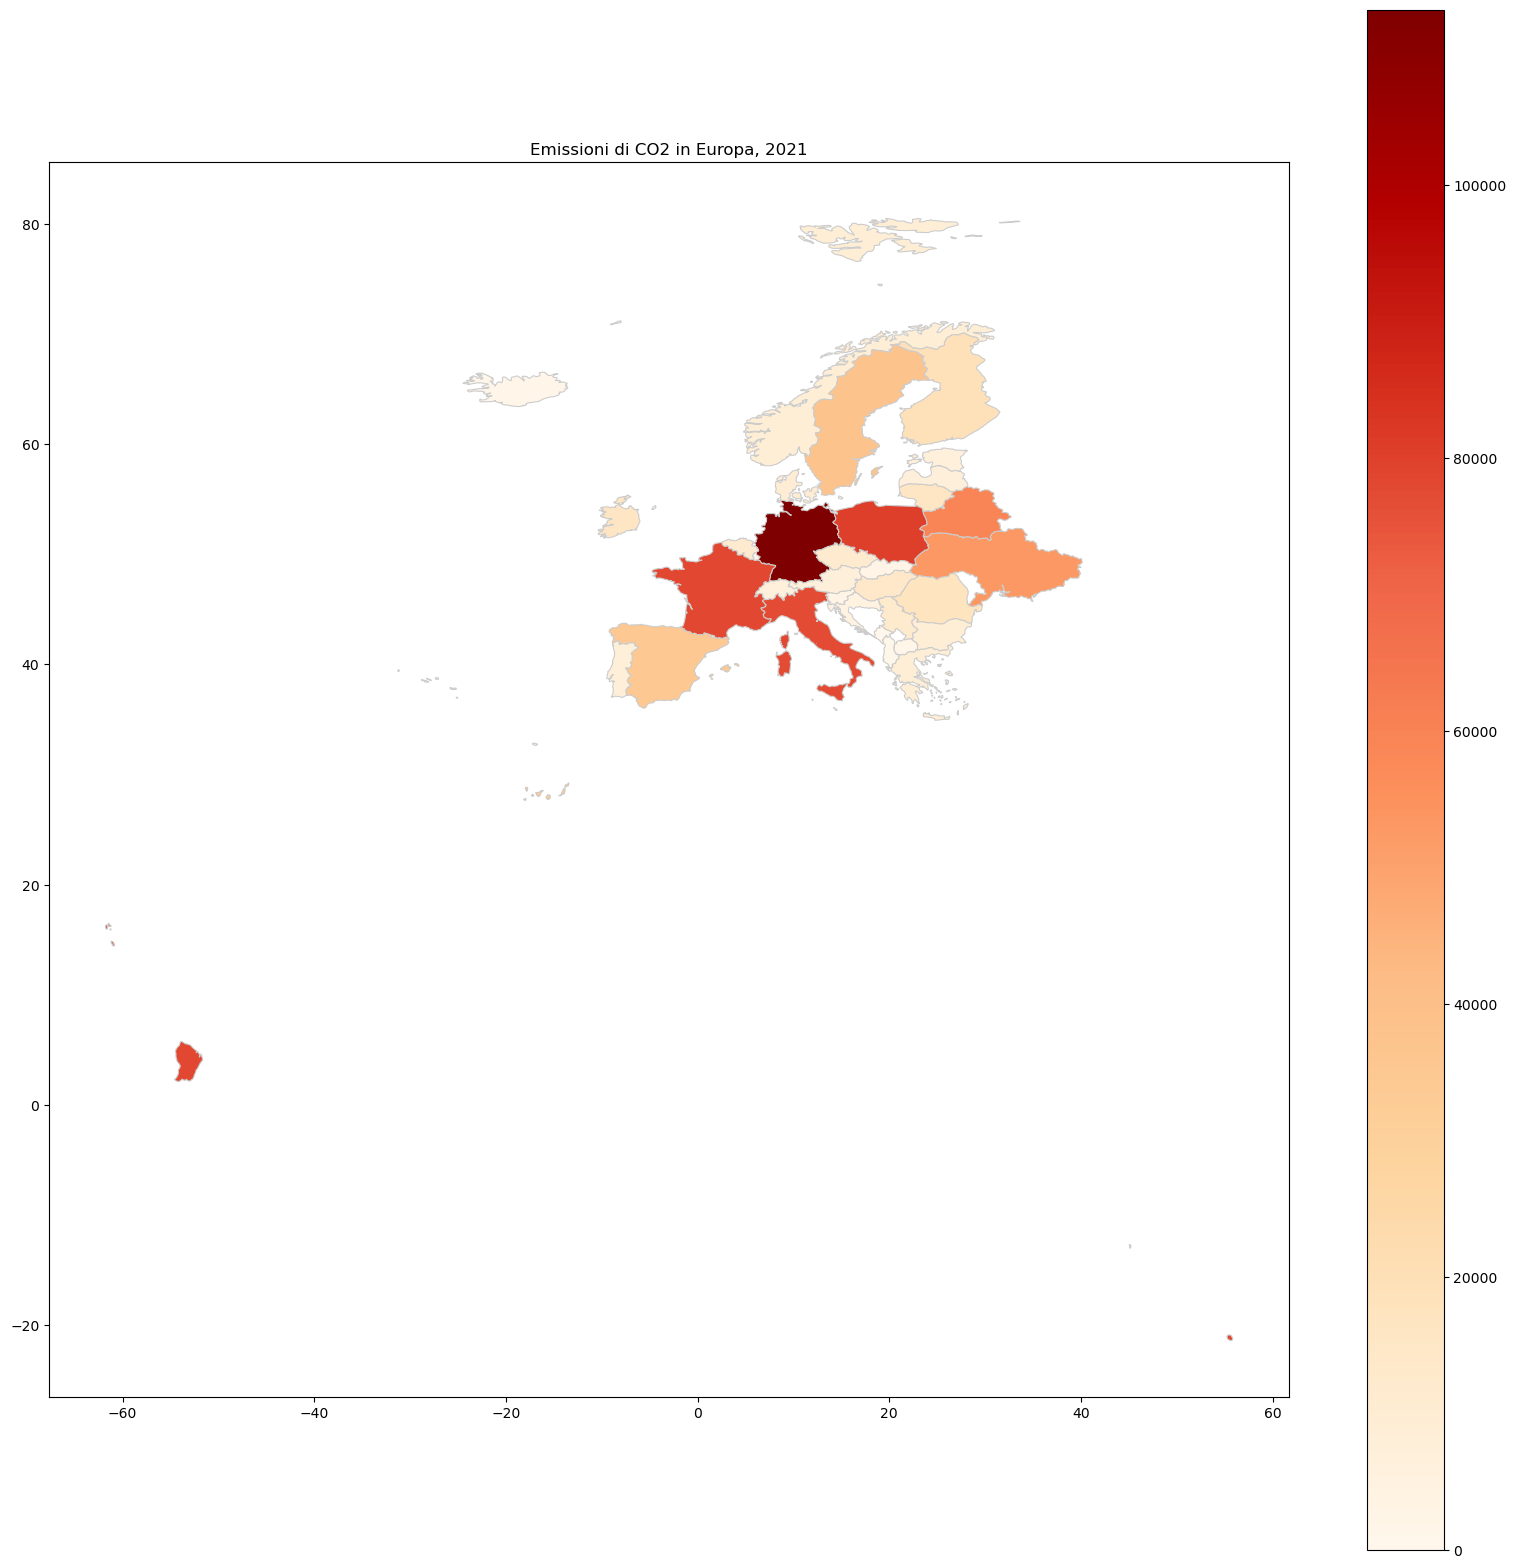

In [5]:
merged_data = europe.merge(co2_data, how="left", left_on="name", right_on="Area")

fig, ax = plt.subplots(1, 1, figsize=(20, 20))
merged_data.plot(column="Value", cmap="OrRd", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
ax.set_title("Emissioni di CO2 in Europa, 2021")
plt.show()

# c'è un pezzo di America Latina che il mio orrendo file ha riconosciuto come Francese, fuck colonialism fuck json

Vediamo in cosa consiste la PAC europea, in dati. 

In [6]:
allocations = pd.read_csv("Planned-financial-allocations-under-the-CAP-Strategic-Plans-2023-27.csv")

In [7]:
cap_story = pd.read_csv("CAP-expenditure-as-%-EU-expenditure-current-prices.csv")
cap_story = cap_story[cap_story['Category'].astype(int) >= 2004]

In [8]:
eagf_numb = pd.read_csv("Planned-financial-allocations-for-Direct-Payments-EAGF.csv")

In [9]:
bar = alt.Chart(cap_story).mark_bar(color="orange").encode(
    x=alt.X('Category:N', title='Anno'),
    y=alt.Y('EU expenditure:Q', title='Spesa in bilioni')
)

line = alt.Chart(cap_story).mark_line(color='red').encode(
    x='Category:N',
    y=alt.Y('CAP at % expenditure:Q', title='CAP at % expenditure')
)

chart = (bar + line).properties(width=1000, height=400, title='EU Expenditure and CAP at % Expenditure Over Years')

chart

alt.LayerChart(...)

Il grafico rappresenta una netta diminuizione dei soldi europei dedicati alla PAC. Il piano strategico del 2023-2027 prevede una spesa di €386.6 bilioni. 

La PAC viene suddivisa in due macrocategorie di spesa: EAGF (pagamenti settoriali e diretti) e EAFRD (sviluppo rurale).

Il programma di sviluppo rurale (RDPs, suddivisi in nazionali e regionali) finanziato dall'Unione Europea è definito sul portale dati EU come <i> Lo sviluppo rurale è il "secondo pilastro" della politica agricola comune (PAC), che rafforza il "primo pilastro" del sostegno al reddito e delle misure di mercato favorendo la sostenibilità sociale, ambientale ed economica delle zone rurali. </i>

La spesa europea di quest'anno è così suddivisa. 

In [10]:
chart1 = alt.Chart(allocations).mark_arc().encode(
    theta=alt.Theta(field="Allocation", type="quantitative"),
    color=alt.Color(field="Categoria", type="nominal", legend=alt.Legend(title="Category")),  # Adding legend
    tooltip=[
        alt.Tooltip("Categoria:N", title="Category"),
        alt.Tooltip("Allocation:Q", title="Allocation in billions", format=".2s")
    ]
).properties(width=200, height=200)

chart1


C:\Users\beatr\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

Guaridamo ora come i pagamenti diretti e settoriali, più dei 3/4 dell'intera cifra destinata alla PAC, sono ulteriormente suddivisi. 

In [11]:
chart2 = alt.Chart(eagf_numb).mark_arc().encode(
    theta=alt.Theta(field="Series 1", type="quantitative"),
    color=alt.Color(field="Category", type="nominal", legend=alt.Legend(title="Tipologia di pagamenti settoriali e diretti")),
    tooltip=[
        alt.Tooltip("Category:N", title="Category (EAGF)"),
        alt.Tooltip("Series 1:Q", title="Allocation in billions", format=".2s")
    ]
).properties(width=200, height=200)

chart2

C:\Users\beatr\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In che modo viene ulteriormente suddivisa questa cifra?
Si legge:

##### 1. Almeno il 30% dei finanziamenti di ciascun PSR (Payment Services Regulation)  deve essere destinato a misure a tutela dell'ambiente o di contrasto ai cambiamenti climatici. Questi sono per lo più convogliati attraverso sovvenzioni e pagamenti annuali agli agricoltori che scelgono pratiche più rispettose dell'ambiente.

##### 2. Almeno il 5% dei finanziamenti dei PSR deve essere destinato ad azioni basate sull'approccio LEADER / sviluppo locale di tipo partecipativo, con lo scopo di coinvolgere le comunità nei processi decisionali. 

In particolare,si legge nel Piano di Valutazione Strategico per la PAC (nel contesto italiano) il seguente elenco di obiettivi:
- competitività del settore agricolo, alimentare e forestale in ottica sostenibile;
- transizione ecologica del settore agricolo, alimentare e forestale;
- capacità di attivare conoscenza, ricerca e innovazioni;
- sviluppodell’economia rurale e rafforzamento della resilienza e della vitalità dei territori rurali;
- promozione del lavoro agricolo e forestale di qualità e la sicurezza sui posti di la
- capacità di diffondere forme di digitalizzazione nei sistemi agroalimentari ealevoro

## Come sono stati suddivisi i pagamenti tra i vari stati?
Andiamo sul sito della raccolta di database Europei legati al mondo agricolo. Accedendo a  https://data.europa.eu/data/sparql?locale=en , cerchiamo una query per ottenere la distribuzinoe dei fondi della PAC per ciascuno stato europeo. 

![...](screen_query_eu.png)

Recuperato il documento, studiamo i dati. 
(https://www.europarl.europa.eu/factsheets/en/sheet/106/financing-of-the-cap-facts-and-figures)

In [12]:
cap_tot = pd.read_csv("capstati.csv")
cap_tot

,Member State,a. Direct aids (1st pillar - EAGF),b. Total 1st pillar - EAGF (incl. (a.)),c. Total EAFRD (2nd pillar),(b+c),% of total EU
0,BE,498.6,557.30,83.20,1.17%,NaN
1,BG,843.2,867.90,354.60,2.25%,NaN
2,HR,347.7,360.70,382.10,1.36%,NaN
3,CZ,852.3,869.40,357.10,2.25%,NaN
4,DK,798.5,808.20,116.70,1.7%,NaN
5,DE,4615.1,4739.80,1354.00,11.2%,NaN
6,EE,165.4,167.10,91.60,0.47%,NaN
7,EL,1990.9,2232.60,635.80,5.3%,NaN
8,ES,5055.0,5666.80,1149.30,12.5%,NaN
9,FR,6807.7,7372.20,1913.10,17.1%,NaN


In [13]:
cap_tot.rename(columns={
    'a. Direct aids (1st pillar - EAGF)': 'Direct aids',
    'b. Total 1st pillar - EAGF (incl. (a.))': 'Direct aids and sectorial aids',
    'c. Total EAFRD (2nd pillar)': 'Rural development',
    '(b+c)': 'Total percentage'
}, inplace=True)

In [14]:
cap_tot.drop(columns=['% of total EU'], inplace=True) #il dataset non riporta il valore in percentuale dell'intera distribuzione, quindi calcoliamolo noi

In [15]:
cap_tot['Sum of aids'] = cap_tot['Direct aids and sectorial aids'] + cap_tot['Rural development']
cap_tot

,Member State,Direct aids,Direct aids and sectorial aids,Rural development,Total percentage,Sum of aids
0,BE,498.6,557.30,83.20,1.17%,640.50
1,BG,843.2,867.90,354.60,2.25%,1222.50
2,HR,347.7,360.70,382.10,1.36%,742.80
3,CZ,852.3,869.40,357.10,2.25%,1226.50
4,DK,798.5,808.20,116.70,1.7%,924.90
5,DE,4615.1,4739.80,1354.00,11.2%,6093.80
6,EE,165.4,167.10,91.60,0.47%,258.70
7,EL,1990.9,2232.60,635.80,5.3%,2868.40
8,ES,5055.0,5666.80,1149.30,12.5%,6816.10
9,FR,6807.7,7372.20,1913.10,17.1%,9285.30


In [16]:
chart = alt.Chart(cap_tot).mark_bar().encode(
    x=alt.X("Member State:N", title="Member State"),  
    y=alt.Y("Sum of aids:Q", title="Sum of aids"),    
    color=alt.Color("Member State:N"),           
    tooltip=[alt.Tooltip("Member State:N"),      
             alt.Tooltip("Sum of aids:Q")        
            ]
).properties(
    width=600,  
    height=400   
)

display(chart)

C:\Users\beatr\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\beatr\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

L'Italia risulta dunque il quarto paese per fondi legati alla PAC di tutta l'Europa, con 5712,5 milioni di euro disponibili per mettere in atto il proprio piano strategico agricolo. 
Allocare i fondi prevede prendere in considerazione numerosi aspetti territoriali: <b> l'area, il numero degli agricoltori, la situazione economica e la tipologia di coltivazione. </b>

Come mostrano i dati Eurostat, le prime quattro potenze sono proprio Francia, Germania, Italia e Spagna; ma i paesi baltici, la Polonia e la Romania stanno fruttando guadagni economici, soprattutto dovuti all'esportazione, che l'Europa sta incentivando tramite fondi. 

Per comprendere la logica dietro la distribuzione, abbiamo raccolto i dati disaggregati relativi ai piani agricoli di ogni stato membro.

[raccolta dati su https://agriculture.ec.europa.eu/cap-my-country/cap-strategic-plans_en]

## Uno sguardo al BISS: supporto verso la transizione ecologica

![Distribuzione della BISS](BIS_allocation.png)

La percentuale del BISS che ciascuno stato decide di dedicare alla transizione ecologica mostra una netta preferenza dei vari paesi europei a destinare i propri fondi verso altre tipologie di aiuti economici (l'unica eccezione, si veda, è la Danimarca). Questa suddivisione può risultare coerente con le economie di paesi che stanno puntando molto sull'agricoltura negli ultimi anni, mentre non è comprensibile per potenze agricole che hanno un impatto ecologico molto più alto - tra cui l'Italia. 

Non risulta dunque adeguato, alla luce delle politiche verdi europee, una tale suddivisione di fondi. 

##### Vediamo come il BISS viene ulteriormente suddiviso

In [17]:
biss_allocation = pd.read_csv('bissallocation.csv')

In [18]:
biss_allocation['BISS_Share_Numeric'] = biss_allocation['BISS (share of DP)'].str.rstrip('%').astype(float) / 100

In [19]:
bar_chart = alt.Chart(biss_allocation).mark_bar().encode(
  x=alt.X("Country:N", title="Country"),  # Ensure consistent x-axis encoding
  y=alt.Y("MS BISS:Q", title="MS BISS ('000 EUR)"),
  color=alt.condition(
    alt.datum.Country == 'Italy',
    alt.value('red'),  # Highlight Italy in red
    alt.value('steelblue')  # Other countries in steelblue
  ),
  tooltip=[alt.Tooltip("Country:N"),
          alt.Tooltip("MS BISS €:Q")]  # Tooltip for bar chart
).properties(
  width=600,
  height=400
)

# Interactive line chart with points and scaled y-axis
line_chart = alt.Chart(biss_allocation).encode(
  x=alt.X("Country:N", title='Country'),  # Ensure consistent x-axis encoding
  y=alt.Y('BISS_Share_Numeric:Q', title='BISS (Share of DP)',
          scale=alt.Scale(domain=[0, 1])), 
).mark_line(color='pink', strokeWidth=30, opacity=1).mark_point(color="orange", opacity=1)  

# Combine charts with independent y-axes and interactivity
combined_chart = alt.layer(bar_chart, line_chart).resolve_scale(y='independent')

combined_chart


C:\Users\beatr\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\beatr\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.LayerChart(...)

https://agriculture.ec.europa.eu/system/files/2023-09/pmef-result-indicators_en.pdf
Questi dati contengono un interessante elemento: il valore DP (e DP/h), ovvero la percentuale di quanto il BISS copra gli aiuti per gli agricoltori con una dimensione economica minore di quella media. 
<b> Eppure, una suddivisione mediana per la maggior parte degli stati - e ancora, tra cui l'Italia - risulta essere impropria per il gap economico che sussiste tra piccole realtà agricole e industrie con consistenti capitali e fondi. </b>

![](Redistribution_tools.png) 

L'Italia, infatti, insieme a diversi altri stati europei, ha scelto di non applicare misure di distribuzione progressiva.
Il Capping prevede che ci siano limiti al numero di pagamenti diretti che un singolo agricoltore può ricevere. La sua assenza dunque può portare alla condizione in cui un'azienda di maggiori dimensioni riceva comunque di più di piccole realtà agricole potenzialmente più bisognose. Allo stesso modo, la tassazione non è fatta in base all'introito ma è uguale, nonostante le profonde differenze economiche delle diverse entità del mondo agroalimentare. 
Questa scelta crea una potenziale situazione di concorrenza economica e spinta per incentivare la produzione massiva di grandi corporazioni agricole, ma inevitabilmente svantaggia uno sviluppo economico equo per consentire ad agricoltori meno abbienti di poter avanzare economicamente. .

Leggiamo sul Report Greenpace del 2023:

I numeri inoltre parlano chiaro: l’80% dei finanziamenti europei destinati all’agricoltura italiana finisce nelle casse di una minoranza privilegiata (il 20% dei beneficiari). 
Questo sistema penalizza le piccole aziende e favorisce quelle più grandi: secondo i dati Eurostat, l’Italia ha perso oltre 320 mila aziende in poco più di 10 anni (tra il 2004 e il 2016), con un calo del 38% tra le “piccole” a fronte di  un aumento del 21% delle aziende “molto grandi” e del 23% di quelle grandi. In un contesto di crisi economica, geopolitica ed ecologica che vede l’aumento dei prezzi delle materie prime e il calo del potere d’acquisto dei cittadini, i piccoli allevatori sono tra le categorie che pagano un prezzo molto alto perché il loro reddito, già esiguo, non fa che ridursi.


Parole alle quali fa eco la voce del prof. Bruori: []

### Un problema di spese: il caso italiano

Sempre sul portale dati EU, leggiamo <i> Il sostegno di base al reddito per la sostenibilità è un pagamento disaccoppiato annuale basato sulla superficie finanziato esclusivamente dal bilancio dell'UE e continua a essere lo strumento più importante della PAC per sostenere il reddito degli agricoltori dell'UE. </i>

##### Ovviamente risulta complicato comprendere il motivo alla luce di molteplici fattori che influenzano la scelta, ma dal momento che l'Italia risulta appunto aver sempre sfruttato relativamente poco i finanziamenti europei, i fondi saranno stati spartiti tenendo conto della concreta utilità. 
Qui torna il tema della difficoltà italiana a spendere gli aiuti economici dell'Unione Europea. Secondo Alberto Mantino, presidente dell’Associazione italiana di agroforestazione, la partecipazione ai bandi regionali risulta macchinosa e complessa a causa della loro mole burocratica e della difficoltà di tradurre in azioni finanziabili alcune delle necessità degli agricoltori. Ciò è anche quello che si legge nel documento "Financial needs in the agriculture and agri-food sectors in Italy", sul sito ufficiale dell'Unione Europea.



## Quindi, in che modo viene speso il resto dei fondi della PAC per l'Italia? 
###### Il 77% (ciò che resta del 23%) viene così destinato.

In [20]:
pac_it = pd.read_csv("totalcapitalia.csv")
pac_it

,Category,Amount
0,AIUTI AL REDDITO,10477775690
1,ECOSCHEMI,4377804830
2,SOSTEGNO ACCOPPIATO,2626682895
3,SVILUPPO RURALE,14775893476
4,AIUTI SETTORIALI,3048197685
5,ASSISTENZA TECNICA,35070377300
6,DOTAZIONE FINANZIARIA COMPLESSIVA,35657058349


In [21]:
chart = alt.Chart(pac_it).mark_arc().encode(
    theta=alt.Theta(field="Amount", type="quantitative"),
    color=alt.Color(field="Category", type="nominal"),
    tooltip=[alt.Tooltip("Category:N"), 
             alt.Tooltip("Amount:Q", format=".6") 
            ]
)

display(chart)

C:\Users\beatr\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

## Quali sussidi vengono utilizzati? Come?

Su PagellaPolitica leggiamo, in un articolo di febbraio 2024: <i> [...] questa categoria rientrano infatti incentivi, agevolazioni, finanziamenti agevolati ed esenzioni da tributi. I sussidi si dividono in due categorie: quelli diretti, che per esempio prevedono trasferimenti di risorse direttamente ai produttori, e quelli indiretti, che contengono sconti fiscali e altre agevolazioni. </i>

Nel catalogo della Quinta Edizione dei Sussidi ambientali (2021), compaiono diverse voci:

In [22]:
suss_amb = pd.read_csv("sussidiambi.csv")
suss_amb

,Codice,Nome,Mld €,FFS,Livello di riformabilità
0,EN.SI.24,Differente trattamento fiscale fra benzina e g...,3.4,FFS,Nazionale
1,IVA.01,IVA agevolata per la cessione di case di abita...,2.6,NaN,Nazionale
2,EN.SD.01,Rilascio delle quote assegnate a titolo gratuito,2.4,FFS,Europeo
3,IVA.13,IVA agevolata per case di abitazione non di lusso,2.3,NaN,Nazionale
4,IVA.07,IVA agevolata per l’energia elettrica per uso ...,1.8,FFS,Nazionale
5,AL.SI.02,Credito d’imposta per beni strumentali - Mezzo...,1.7,NaN,Nazionale
6,EN.SI.19,Rimborso del maggior onere dall’aumento dell’a...,1.4,FFS,Nazionale
7,TR.SI.04,Agevolazioni fiscali sui fringe benefit,1.2,FFS,Nazionale
8,EN.SI.21,Impiego dei prodotti energetici nei lavori agr...,0.9,FFS,Nazionale
9,EN.SI.04,Esenzione dall’accisa sui carburanti per la na...,0.9,FFS,Internazionale/Nazionale


In [23]:
chart = alt.Chart(suss_amb).mark_bar().encode(
    x=alt.X("Nome:N", title="Nome"),  
    y=alt.Y("Mld €:Q", title="Mld €"),    
    color=alt.Color("Nome:N"),           
    tooltip=[alt.Tooltip("Nome:N"),      
             alt.Tooltip("Mld €:Q")        
            ]
).properties(
    width=600,  
    height=400   
)

display(chart)

C:\Users\beatr\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\beatr\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

I sussidi di cui sopra includono la possibilità di poter usufruite di aiuti economici con carburante, pesticidi, e smaltimento rifiuti. Questo genere di SAD, ovvero <b> sussidi ambientali dannosi </b>, affiancati ai SAI ("sussidi ambientali incerti"). 

## Sussidi ambientali dannosi
#### Fertilizzanti

In Italia, l'ISPRA (Istituto Superiore per la Protezione e la Ricerca Ambientale) monitora la situazione legata all'uso di pesticidi, e il quadro fornito fino al 2021 è il seguente:

In [24]:
fertilizzanti = pd.read_csv("Pesticidi/tipo fert.csv")
fertilizzanti = fertilizzanti.melt(id_vars=['Tipo di fertilizzante'], var_name='Year', value_name='Tonnellate')

In [25]:
chart = alt.Chart(fertilizzanti, width=700, height=500).mark_bar(
    cornerRadiusTopLeft=3,
    cornerRadiusTopRight=3
).encode(
    x='Year:O',
    y='Tonnellate:Q', 
    color='Tipo di fertilizzante:N'
)

display(chart)

C:\Users\beatr\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

I fertilizzanti sintetici, i cui precessi di produzione e trasporto causano emissioni di carbonio, e il loro uso in agricoltura provoca il rilascio di protossido di azoto, costituiscono i 2/3 del totale, con effetti non ignorabili. 

In [26]:
tot_fert = pd.read_csv("Pesticidi/tot fert.csv")

In [27]:
tot_fert = pd.DataFrame({
    'Year': ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
    'FERTILIZZANTI CHIMICI': [6086, 6241, 5352, 4764, 4686, 5232, 5563, 5472, 5087, 5576, 5615],
    'FERTILIZZANTI ORGANICI': [3311, 3174, 3330, 3342, 3195, 3636, 3785, 3674, 3875, 3994, 3833]
})

# Creazione del grafico utilizzando Altair
chart = alt.Chart(tot_fert).mark_bar(
    cornerRadiusTopLeft=3,
    cornerRadiusTopRight=3
).encode(
    x='Year:O',
    y=alt.Y('FERTILIZZANTI CHIMICI:Q', axis=alt.Axis(title='Tonnellate')),  # Asse y con etichetta "Tonnellate"
    color=alt.Color('Fertilizzanti:N', scale=alt.Scale(domain=['FERTILIZZANTI CHIMICI', 'FERTILIZZANTI ORGANICI'], range=['blue', 'green']), legend=alt.Legend(title=None)),  # Colore e legenda per i fertilizzanti
).properties(
    width=700,
    height=500
).transform_fold(
    fold=['FERTILIZZANTI CHIMICI', 'FERTILIZZANTI ORGANICI'],  # Unisci le due colonne in una singola colonna "Fertilizzanti"
    as_=['Fertilizzanti', 'Tonnellate']  # Rinomina le colonne unite
)

display(chart)

C:\Users\beatr\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

I fertilizzanti hanno garantito un aumento della produttività, della resistenza e maggiore sviluppo del settore agricolo. Ma, ovviamente, i danni ambientali non sono ignorabili. Nel paper <i>Greenhouse gas emissions from global production and use of nitrogen synthetic fertilisers in agriculture</i> (2022), una collaborazione tra Green Peace, Università di Torino e University of Exeter, venogno sottolineati i numeri delle emissioni di gas serra. 
Analizziamo, utlizzando gli stessi dati FAO adottati per condurre uno studio su macro-scala, la situazione italiana. lity

In [28]:
emissioni_fert = pd.read_csv("Pesticidi/emissioni_fert.csv")
emissioni_fert

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GT,Emissions totals,380,Italy,7234,Direct emissions (N2O),5061,Synthetic Fertilizers,2015,2015,3050,FAO TIER 1,kt,9.5109,E,Estimated value,NaN
1,GT,Emissions totals,380,Italy,7236,Indirect emissions (N2O),5061,Synthetic Fertilizers,2015,2015,3050,FAO TIER 1,kt,3.0910,E,Estimated value,NaN
2,GT,Emissions totals,380,Italy,7230,Emissions (N2O),5061,Synthetic Fertilizers,2015,2015,3050,FAO TIER 1,kt,12.6019,E,Estimated value,NaN
3,GT,Emissions totals,380,Italy,724313,Emissions (CO2eq) from N2O (AR5),5061,Synthetic Fertilizers,2015,2015,3050,FAO TIER 1,kt,3339.5035,E,Estimated value,NaN
4,GT,Emissions totals,380,Italy,723113,Emissions (CO2eq) (AR5),5061,Synthetic Fertilizers,2015,2015,3050,FAO TIER 1,kt,3339.5035,E,Estimated value,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,GT,Emissions totals,380,Italy,723113,Emissions (CO2eq) (AR5),6504,Fertilizers Manufacturing,2020,2020,3050,FAO TIER 1,kt,1531.7306,E,Estimated value,NaN
59,GT,Emissions totals,380,Italy,7230,Emissions (N2O),6504,Fertilizers Manufacturing,2021,2021,3050,FAO TIER 1,kt,0.2101,E,Estimated value,NaN
60,GT,Emissions totals,380,Italy,7273,Emissions (CO2),6504,Fertilizers Manufacturing,2021,2021,3050,FAO TIER 1,kt,1530.4379,E,Estimated value,NaN
61,GT,Emissions totals,380,Italy,724313,Emissions (CO2eq) from N2O (AR5),6504,Fertilizers Manufacturing,2021,2021,3050,FAO TIER 1,kt,55.6866,E,Estimated value,NaN


In [29]:
emissioni_fert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       63 non-null     object 
 1   Domain            63 non-null     object 
 2   Area Code (M49)   63 non-null     int64  
 3   Area              63 non-null     object 
 4   Element Code      63 non-null     int64  
 5   Element           63 non-null     object 
 6   Item Code         63 non-null     int64  
 7   Item              63 non-null     object 
 8   Year Code         63 non-null     int64  
 9   Year              63 non-null     int64  
 10  Source Code       63 non-null     int64  
 11  Source            63 non-null     object 
 12  Unit              63 non-null     object 
 13  Value             63 non-null     float64
 14  Flag              63 non-null     object 
 15  Flag Description  63 non-null     object 
 16  Note              0 non-null      float64
dtyp

In [30]:
emissioni_fert.nunique()

Domain Code          1
Domain               1
Area Code (M49)      1
Area                 1
Element Code         6
Element              6
Item Code            2
Item                 2
Year Code            7
Year                 7
Source Code          1
Source               1
Unit                 1
Value               56
Flag                 1
Flag Description     1
Note                 0
dtype: int64

In [31]:
emissioni_fert = emissioni_fert.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Item Code', 'Item', 'Source Code', 'Source', 'Unit', 'Flag', 'Flag Description', 'Note', 'Year Code'],axis=1)
emissioni_fert

,Element Code,Element,Year,Value
0,7234,Direct emissions (N2O),2015,9.5109
1,7236,Indirect emissions (N2O),2015,3.0910
2,7230,Emissions (N2O),2015,12.6019
3,724313,Emissions (CO2eq) from N2O (AR5),2015,3339.5035
4,723113,Emissions (CO2eq) (AR5),2015,3339.5035
...,...,...,...,...
58,723113,Emissions (CO2eq) (AR5),2020,1531.7306
59,7230,Emissions (N2O),2021,0.2101
60,7273,Emissions (CO2),2021,1530.4379
61,724313,Emissions (CO2eq) from N2O (AR5),2021,55.6866


In [32]:
emissioni_fert["Element"].unique()

array(['Direct emissions (N2O)', 'Indirect emissions (N2O)',
       'Emissions (N2O)', 'Emissions (CO2eq) from N2O (AR5)',
       'Emissions (CO2eq) (AR5)', 'Emissions (CO2)'], dtype=object)

In [33]:
chart = alt.Chart(emissioni_fert).mark_line(interpolate='step').encode(
    x='Year:O',  
    y='Value:Q',  
    color='Element:N'  
).properties(
    width=600,
    height=400
)

chart

C:\Users\beatr\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

L'andamento delle emissioni è rimasto per lo più costante, dimostrando uno scarso successo delle politiche che già incentivavamo l'abbandono delle emissioni dovute all'uso e alla produzione di fertilizzanti chimici. 

#### Pesticidi

Un'altro protagonista importande dell'impatto ambientale delle politiche agricole italiane sono i <b>pesticidi</b>.

La commissione Europea ha decretato precisi obblighi da rispettare per ripristinare condizioni ambientali estremamente danneggiate, dalle terre agricole ai mari, dalle foreste agli ambienti urbani. Infatti, essa propone di ridurre del 50% l'uso e il rischio dei pesticidi chimici entro il 2030. 

Tra le gravi implicazioni dell'uso di tonnellate di pesticidi, si richimano infatti spesso la biodiversità a rischio e la concentrazione di pesticidi trovate negli alimenti. 

L'obiettivo è riparare l'80% degli habitat europei in cattive condizioni, ùcoprire almeno il 20% delle terre e delle aree marine dell'UE entro il 2030 con misure di ripristino della natura, ed estendere eventualmente queste misure a tutti gli ecosistemi che necessitano di ripristino entro il 2050.
Agricoltori, boscaioli e pescatori sono dunque invitati a riconsiderare l'uso di pesticidi dannosi e altri prodotti potenzialmente pericolosi per il benessere di fauna e flora.  Per questo, regole robuste per ridurre l'uso dei pesticidi chimici e garantire sistemi alimentari più sostenibili entro il 2030 sono state applicate a partire dalla votazione favorevole del nuovo Piano.

Nuove regole riguardanti il controllo dei parassiti rispettoso dell'ambiente: Nuove misure garantiranno che tutti gli agricoltori e gli altri utilizzatori professionali dei pesticidi praticino la Gestione Integrata dei Parassiti (IPM), in cui vengono considerati per primi metodi alternativi rispettosi dell'ambiente per la prevenzione e il controllo dei parassiti, prima che i pesticidi chimici possano essere utilizzati come ultima risorsa. Le misure includono anche la registrazione obbligatoria per gli agricoltori e altri utilizzatori professionali. Inoltre, gli Stati membri devono stabilire regole specifiche per le colture identificando le alternative da utilizzare invece dei pesticidi chimici.
Un divieto su tutti i pesticidi in aree sensibili.

###### Fonti: https://ec.europa.eu/commission/presscorner/detail/en/ip_22_3746

Nel 2019 le concentrazioni misurate di pesticidi hanno superato i limiti previsti dalle normative nel 25% dei siti di monitoraggio per le acque superficiali e nel 5% di quelli per le acque sotterranee. La contaminazione rilevata è ancora sottostimata, a causa delle difficoltà tecniche e metodologiche, anche se negli anni l’efficacia del monitoraggio sta migliorando in relazione alla copertura territoriale, al numero di campioni analizzati e alle sostanze cercate.

Un forte impulso a transitare verso un’agricoltura più sostenibile è impartito da due strategie chiave nell’ambito del Green Deal europeo: “Biodiversità 2030” e “Dal produttore al consumatore” (Farm to fork). Quest’ultima prevede la riduzione dell’uso dei pesticidi del 50% entro il 2030.


###### Fonte: https://www.isprambiente.gov.it/files2021/pubblicazioni/pubblicazioni-di-pregio/tea.pdf

![...](Pesticidi/itali_ausp.jpg)
![...](Pesticidi/itali_ausp2.jpg)



###### Fonte: https://food.ec.europa.eu/plants/pesticides/sustainable-use-pesticides/farm-fork-targets-progress/member-states-trends_en#Italy

## Biodiversità

L'Italia è uno degli stati europei con il più alto livello di biodiversità.
Si stimano esserci più di 58,000 specie locali (anche se stime calcolate su certe tipologie di insetti alzano il numero fino a 65,000), di cui il 2 % vertebrati, il 3% di protozoi, e il restante 95% di invertebrati. Ci sono oltre 6.700 specie di piante vascolari, 1.156 specie registrate di briofite e circa 20.000 specie conosciute di funghi, inclusi 2.328 taxa di licheni. Notevolmente, ogni anno vengono pubblicate almeno 20 nuove specie in Italia. Il paese ha un'alta incidenza di specie endemiche, con circa il 30% delle specie animali e il 15% delle specie di piante vascolari che sono endemiche. La Sicilia e la Sardegna sono particolarmente importanti a questo riguardo (la loro flora indigena rappresenta l'11% di tutta la flora italiana, di cui il 15,26% è endemica).

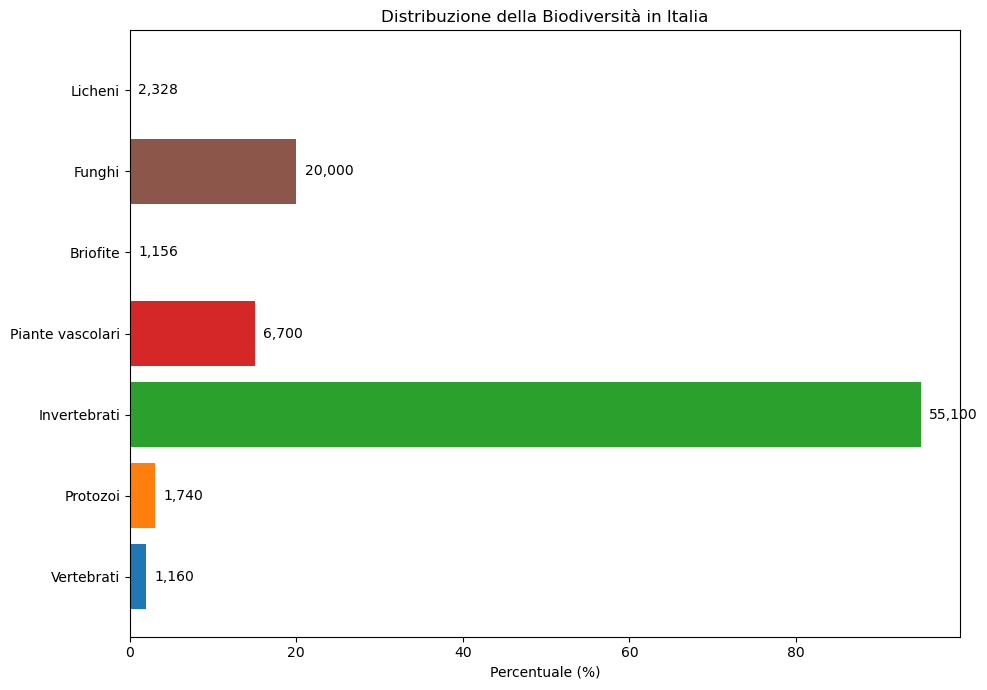

In [34]:
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Dati
categories = ['Vertebrati', 'Protozoi', 'Invertebrati', 'Piante vascolari', 'Briofite', 'Funghi', 'Licheni']
percentages = [2, 3, 95, 15, 1.156 / 6700 * 100, 20, 2.328 / 20000 * 100]
species_count = [58000 * p / 100 for p in percentages[:3]] + [6700, 1156, 20000, 2328]

# Creare il grafico
fig, ax = plt.subplots(figsize=(10, 7))

# Bar plot per le percentuali
bars = ax.barh(categories, percentages, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'])

# Aggiungere etichette
for bar, count in zip(bars, species_count):
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{int(count):,}', va='center', ha='left')

ax.set_xlabel('Percentuale (%)')
ax.set_title('Distribuzione della Biodiversità in Italia')
plt.tight_layout()

plt.show()

In [35]:
biodiv = pd.read_csv("Pesticidi/conservation-status-of-habitats-at-1.csv")
biodiv

,Member state:+text,Good-Abs:number,Unknown-Abs:number,Poor-Abs:number,Bad-Abs:number,Total-Abs:number,Good:number,Unknown:number,Poor:number,Bad:number
0,Belgium (93),4,1.0,14,74,93,4.30,1.08,15.05,79.57
1,Denmark (111),6,NaN,20,85,111,5.41,0.00,18.02,76.58
2,Spain (247),22,44.0,139,42,247,8.91,17.81,56.28,17.00
3,Latvia (61),6,5.0,27,23,61,9.84,8.20,44.26,37.70
4,Italy (263),26,11.0,124,102,263,9.89,4.18,47.15,38.78
5,Netherlands (52),6,NaN,18,28,52,11.54,0.00,34.62,53.85
6,Bulgaria (188),23,6.0,149,10,188,12.23,3.19,79.26,5.32
7,Hungary (45),6,NaN,17,22,45,13.33,0.00,37.78,48.89
8,Ireland (59),9,NaN,27,23,59,15.25,0.00,45.76,38.98
9,United Kindom (87),14,1.0,10,62,87,16.09,1.15,11.49,71.26


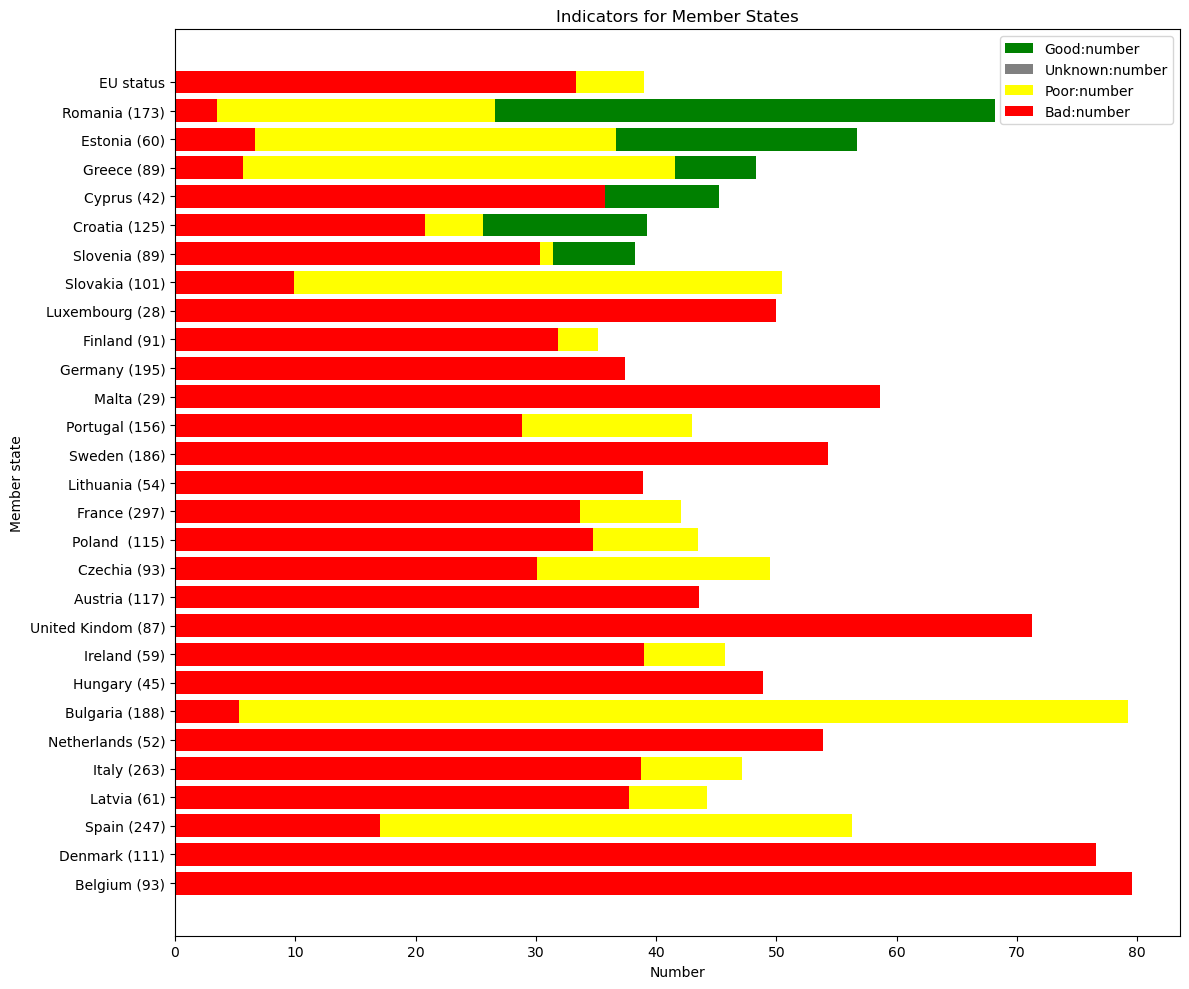

In [36]:
biodiv = biodiv[["Member state:+text", "Good:number", "Unknown:number", "Poor:number", "Bad:number"]]

# Set Member state:+text as index
biodiv.set_index("Member state:+text", inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(12, 10))

# Define colors for each indicator
colors = {
    "Good:number": "green",
    "Unknown:number": "grey",
    "Poor:number": "yellow",
    "Bad:number": "red"
}

# Plot each bar
for i, column in enumerate(biodiv.columns):
    ax.barh(biodiv.index, biodiv[column], color=colors[column], label=column)

# Add legend and labels
ax.legend()
ax.set_xlabel('Number')
ax.set_ylabel('Member state')
ax.set_title('Indicators for Member States')

plt.tight_layout()
plt.show()

## Non estremismo, ma attenzione ai danni verso la stessa filiera agricola

Il Green Deal propone in più modi la tutela della biodiversità, e uno delle strategie adottate è l'obbligo di lasciare il 4% dei terreni incolti.

##### Ci sono doverose premesse da fare:
1. Per tutto il 2024 questo obbligo non verrà esercitato, considerando la tenesione sui prezzi dei cereali dovuta alla guerra tra Russia e Ucrania. 
2. Questi obblighi saranno condizione per ottenere i sussidi ulteriori che l'Europa foraggia.
3. Il vincolo è solo per le aziende seminative. 
4. Questo 4% di territori incolti può essere esercitato mediante mantenimento di condizioni caratteristiche del paesaggio, quindi fiumi, laghi, boschetti etc. Territori, insomma, importanti per mantenere la biodiversità.

Cos'è, dunque, questa misura? Secondo le parole del prof. Brunori: 

<b> Il 4% è un frutto di un compromesso: inizialmente la commissione dava fondi per ettarno ma se fatte rotazioni per ettaro, e le organizzazioni si sono impuntante. </b>.

D'altro canto, il vincolo del 4% involto non riguarda la rotazione della semina che permette una maggiore produttività e resistenza del terreno. Sono due aspetti separati, dal momento che la riduzione di SAU coltivata non ha uno stretto beneficio in termini di ripresa del terreno, ma è maggiormente pensato per una tutela di specie. 
Per questo motivo, gli agricoltori sono estremamente scettici rispetto a questa tipologia di misura. 

è difficile certo valutare ogni variabile per comprendere appieno dove possa essere il guadagno maggiore, sia a lungo sia a breve termine, e per chi. 

Ciò che è certo, è che il sistema di bandi risulta ancora poco accessibile ad una parte della realtà agricola italiana, come appena visto. E inoltre, laddove c'è attenzione alla biodiversità, c'è anche una assenza di reale equilibrio di visioni. 
Il primo esempio è la noncuranza rispetto alla quantità di risorse (tra terreni, mantenimenti idrici ed elettrici, e ambientali) che le colture destinati agli allevamenti zootecnici richiedono. 

[DATI RICCARDO E ANTONIO]

#### Il problema della fauna selvatica

Altro punto citato dagli agricoltori è quello del controllo della fauna selvatica. 

In Italia, controllo e contenimento della fauna selvatica sono normate nella legge numer 157, del 1992. Essa è tutelata con gradi diversi di attenzione: lupi e orsi sono "particolarmente protetti". Nel caso invece dei cinghiali non c'è il diritto di caccia ma nemmeno un particolare attenzione sul piano giuridico. Discorso divero viene fatto per cetacei, tartarughe e uccelli marine, che non sono normati a livello di legge - mentre inclusi nel Gree Deal Europeo. 

Nel 2023, la legge di bilancio ha inserito un PIano Straordinario per la gestione e il contenimento della fauna selvatica. 
Aumenta il personale autorizzato all'abbattimento, prima limitato solo a cacciatori iscritti all'albo e guardie venatorie, anche agenti di polizia locale e conduttori di fondi purché muniti di licenza. Eppure, molte delibere regionali portano ad ulteriori proroghe.

L'ISPRA ha valutato che tra il 2015 e il 2021 si sono registrati danni vicino a 120 milioni di euro, causato per il 90% da cinghiali e per il restante 10% da caprioli e cervi. 
La causa dell'aumento dei cinghiali è l'urbanizzazione, ma un altro fondamentale aspetto, citato anche dal prof. Bruonri, è il rimboschimento dei campi.

Dopo le riforme si potevano vendere i titoli legati alla terra, si poteva vendere il titolo senza la terra: vendevo il diritto da parte di un altro agricoltore ad acquisire le sovvenzioni della PAC legandole ad un altro terreno. Quindi, molte aziende comprano terreni di montagna per far vedere che hanno terra. Da questo punto di vista, siccome la PAC è un enorme corpo burocratico, è possibile che la protesta alla fine sia legata al fatto che la questione della politica agricola comunitaria sia diventata ingestibile. 
Lo dimmostra il censimento de 2010-2020: aumento del bosco perché molti terreni vengono abbandonati, comportando una decrescita di SAU.

### Conclusioni

Eppure, alcuni aspetti di agevolazioni e contromisure per prevenire ulteriori danni ambientali sembrano cozzare, quantomeno in un contesto complesso dove la maggior parte dei lavoratori agricoli svolgono un lavoro di tipo "familiare", non retribuito in altro modo. 
Vediamo allora che tipo di soluzioni sta adottando l'Italia per bilanciare la situazione, per trovare il miglior compromesso tra politiche agricole sostenibili e una corretta transizione ecologica per le tasche degli agricoltori.